<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Users segmentation based on unsupervised machine learning techniques.</h2>
<br><h3>Problem:</h3>

As data science consultants for the marketing department, we analyzed consumers download behavior based on information about demographics, psychometrics, and behaviors through the mobile survey data. By using unsupervised machine learning techniques, we profiled specific audiences and user segments to determine a strategy for the marketing department. 

<h3>Key insights:</h3>
<ul>
    <li>Behavior patterns - Two Extreme User Segments </li>
        <ul>
            <li>Say No to Old Skool Music: These users tend to favor newer music platforms than older platforms </li>
            <li>Stimulated Socializers: These users always need to be connected with the world through their phones </li>
        </ul><br>
    
<li>Psychometric patterns - Two Extreme User Segments </li>
        <ul>
            <li>Tech Loner: These user use the internet to avoid social gatherings but are also interested in pop culture. they don't like brands or follow trends </li>
            <li>Tech Social Control: Individuals who use internet as needed, they are not dependent on it but they're practical and use it for the necessary things </li>
        </ul><br>
        
<li>Demographic patterns </li>
        <ul>
            <li>Those who are separated Widowed or divorced tend to avoid relationships and would use tech to occupy their time while avoiding social engagements </li>
            <li>The Gen Z generation tends to relate to the tech loner segment to avoid social commitments with friends and family and use the internet to connect with their favorite popular cultural interest. </li>
            <li>High school graduates and individuals who completed some high school are more inclined to immerse them selves with internet and stay secluded. high school graduates tend to avoid social engagements because there are no achievements to show off or share with others. </li>
            <li>Those who are wealthy use technology mostly to control their surroundings and social life. Individuals with more money and resources are practical and have less time, so they tend to use internet to stay connected with their social life. </li>
        </ul><br>
</ul>

<h3>Implementation Strategy: What do we plan what to do?</h3>
    <ul>
        <li>Focus on people who are separated Widowed or divorced because they'll make great customers applications for self development and emotional expressions.  </li>
        <li>The Gen Z generation would be a great fit for application based on trends and socialization. </li>
        <li>Focus on Productivity and social applications for for practical high income people. </li>
    </ul>
   
   
   
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


In [1]:
"""
    Introduction:
        Goal: To segment users based on unsupervised machine learning 
        techniques. 
     
    Note:   Data set is in a /__datasets/ folder
            Data set is Mobile_App_Survey_Data.xlsx
            
    
    Known bugs: None
"""


########################################
# importing packages
########################################
import numpy             as np  # mathematical essentials
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn           as sns # enhanced visualization
import sys                      # system-specific parameters and functions


# packages for unsupervised learning
from sklearn.decomposition import PCA            # pca
from sklearn.datasets      import load_digits    # digits dataset
from sklearn.preprocessing import StandardScaler # standard scaler
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans # k-means clustering


########################################
# loading data and setting display options
########################################
# loading data
mas_df = pd.read_excel('./__datasets/Mobile_App_Survey_Data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
np.set_printoptions(threshold=sys.maxsize)




<br><br><strong>Methodology</strong>


We used mobile survey data to analyze consumer's download behavior based on information about demographics, psychometrics, and behaviors. We are assuming that a tech sector company based in an unknown location targeting consumers in the United State of America market, has hired us to find patterns in the Mobile Application Survey to determine users and segments and then provide interpretation and recommendations for the Marketing Department. Using Mobile Application Survey Data without pre-assigned labels or scores of the metrics that were inquired through the survey, us as data science consultants agreed to use machine learning techniques, specifically Unsupervised Learning to find and identify patterns within the survey data. To note, as we do not know the company, it's application that it is developing, or the application features it has, we can only use the data provided about individuals who are either inclined to download/use mobile applications or not download mobile applications. We as data science consultants must provide information to the company's marketing department. This information is about Users and the Segment that they belong to and we assume that we are finding information for a company in an unknown location, to provide analysis and recommendations on which user segments to target. 

As demographic questions presented included race like African American, American Indian, and Ethnicity questions Hispanic and Latino, along with Household income using the US Dollar Sign, we are assuming the company is either an United States based tech company or a tech company focusing on data to target US consumers. 
<br><br>

In [2]:
########################################
# pca_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# pca_plotter
def pca_plotter(bunch,
                colors  = None,
                x_label = "First principal component",
                y_label = "Second principal component"):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in PCA
colors       : color coding for target labels, default None
x_label      : x-label for PC 0, default "First principal component"
y_label      : y-label for PC 1, default "Second principal component"
"""

    # INSTANTIATING a PCA object
    pca = PCA(n_components = 2,
              random_state = 219)


    # FITTING and TRANSFORMING the data
    dataset_pca = pca.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_pca[:, 0].min(), dataset_pca[:, 0].max())
    plt.ylim(dataset_pca[:, 1].min(), dataset_pca[:, 1].max())


    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_pca[i, 0],
                 dataset_pca[i, 1],
                 str(bunch.target[i]),
                 color = colors[bunch.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xlabel(xlabel = x_label)
    plt.ylabel(ylabel = y_label)
    plt.show()

    
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/mas_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()
    
########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

<br><br>
<strong>User Defined Functions:</strong>
The above code is to preparing user defined functions that we'll use to Visually inspect the data and model outputs. 
Preparing data for data visualization to interpret and understand the information and to create charts for the marketing department to further review.

<strong>Feature Engineering: </strong>
<br>Grouping and extracting features form raw data. 
We are transforming some raw data to get the best results from the algorithms. 
We would apply the scaler function to get accurate results from distance based model calculation.

We created three data categories
<ul>
    <li>Psychometric Information</li>
    <ul>
        <li>Question 24. Please tell us how much you agree or disagree with each of the following statements.</li>
        <ul>
            <li>Response 1. I try to keep up with technological developments</li>
            <li>Response 2. People often ask my advice when they are looking to buy technology or electronic products</li>
            <li>Response 3. I enjoy purchasing new gadgets and appliances</li>
            <li>Response 4. I think there is too much technology in everyday life</li>
            <li>Response 5. I enjoy using technology to give me more control over my life </li>
            <li>Response 6. I look for web tools and Apps that help me save time</li>
            <li>Response 7. Music is an important part of my life</li>
            <li>Response 8. I like learning more about my favorite TV shows when I’m not watching them</li>
            <li>Response 9. I think there is too much information out there today from the internet and sites like Facebook </li>
            <li>Response 10. I’m always checking on friends and family through Facebook or other networking websites</li>
            <li>Response 11. The internet makes it easier to keep in touch with family and friends</li>
            <li>Response 12. The internet makes it easy to avoid seeing or having to speak with family and friends</li>
        </ul>
        <li>Question 25. And how much do you agree or disagree with each of the following?</li>
        <ul>
            <li>Response 1. I consider myself an opinion leader</li>
            <li>Response 2. I like to stand out from others </li>
            <li>Response 3. I like to offer advice to others</li>
            <li>Response 4. I like to take the lead in decision making</li>
            <li>Response 5. I’m the first of my friends and family to try new things </li>
            <li>Response 6. Responsibility is overrated; I’d rather be told what to do</li>
            <li>Response 7. I like being in control</li>
            <li>Response 8. I’m a risk taker</li>
            <li>Response 9. I think of myself as creative </li>
            <li>Response 10. I am an optimistic person</li>
            <li>Response 11. I am very active and always on the go</li>
            <li>Response 12. I always feel stretched for time</li>
        </ul>
        <li>Question 26. How much do you agree or disagree with each of these statements?</li>
        <ul>
            <li>Response 3. I am always on the lookout for a bargain, discounts or deals </li>
            <li>Response 4. I derive enjoyment from any kind of shopping</li>
            <li>Response 5. I like package deals because I don’t have to do as much planning</li>
            <li>Response 6. I’m always shopping online</li>
            <li>Response 7. I prefer to buy designer brands.</li>
            <li>Response 8. I can’t get enough Apps</li>
            <li>Response 9. It’s not the number of Apps you have but how cool they are that really matters</li>
            <li>Response 10. I love showing off my new Apps to others</li>
            <li>Response 11. My children have an impact on the Apps I download</li>
            <li>Response12. It’s usually worth spending a few extra dollars to get extra App features r13. There’s no point in earning money if I’m not going to spend it</li>
            <li>Response 14. I am influenced by what’s hot and what’s not r15. I buy brands that reflect my style</li>
            <li>Response 16. I tend to make impulse purchases</li>
            <li>Response 17. Above all else, I think of my mobile phone as a source of entertainment</li>
            <li>Response 18. I find I’m often attracted to luxury brands.</li>
        </ul>
    </ul>    
    <br><li>Demographic Information</li>
    <ul>
            <li>Question 1. Which of the following best describes your age?</li>
            <li>Question 2. Do you own any of the following smartphones or other web-enabled devices?</li>
            <li>Question 48. Which of the following best describes the highest level of education you have attained?</li>
            <li>Question 49. Which of the following best describe your marital status?</li>
            <li>Question 50. Do you currently have any children in the following age groups?</li>
            <li>Question 54. Which of the following best describes your race?</li>
            <li>Question 55. Do you consider yourself to be of Hispanic or Latino ethnicity?</li>
            <li>Question 56. Which of the following best describes your household annual income before taxes?</li>
            <li>Question 57. Please indicate your gender.</li>
    </ul>
    <br><li>Behavioral Information</li>
    <ul>    
            <li>Question 4. Do you use any of the following kinds of Apps? </li>
            <li>Question 11. How many Apps do you have on your smartphone/iPod Touch/Tablet? If you have more than of these device, please tell us the total number of Apps.</li>
            <li>Question 12. Of your Apps, what percent were free to download? </li>
            <li>Question 13. How many times per week do you visit each of the following websites? </li>
    </ul>
</ul>
    
    
<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Dropping demographic information and scale the data.</h4>

Creating a list of columns to enable us drop demographic, behavioral and psychometric 
information and another list to add it back later.

We standard scaler to standardize dataset features because they have different unit measures. 
Standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. <a href = "https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02">Source</a>

We scaled Psychometric information by observation first to account for user cultural and environmental norms. 
<br>

After Analysis we excluded these questions from PCA
<br><blockquote>Question 2 response 10 (q2r10) - Do you own any of the following smartphones or other web-enabled devices? - None
<br>Question 4 response 11 (q4r11) - Do you use any of the following kinds of Apps? - None</blockquote> 
<br>This is because we are analyzing mobile app download and usage and these answers are less important due to the data reflecting non-users of mobile devices and/or apps. Moreover, q4r1 through q4r10 were also excluded out of the Behavioral PCA due to the agreement between the consultants that q4 would dominate the PCA analysis. As most users use multiple apps, looking at the data set, the consultants needed to focus and understand other components.


<br><br>

In [3]:
#making a drop list for Demographic and Behavior
drop_lst_psy = ['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 
                'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 
                'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 
                'q4r10', 'q4r11', 'q11', 'q12', 'q13r1', 'q13r2', 'q13r3', 
                'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 
                'q13r10', 'q13r11', 'q13r12','q48', 'q49', 'q50r1', 'q50r2', 
                'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57']

#making a drop list for psychometric and Demographics
drop_lst_bhv = ['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 
                'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10','q4r1', 'q4r2', 'q4r3',
                'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10','q4r11', 
                'q24r1', 'q24r2', 'q24r3','q24r4', 'q24r5', 'q24r6', 'q24r7', 
                'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 'q25r2', 
                'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 
                'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3',
                'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9',
                'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15',
                'q26r16', 'q26r17', 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3',
                'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57']


#Making add list to add behavioral features not used in pca
add_list    = ['q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 
               'q4r8', 'q4r9', 'q4r10']

add_dem_lst = [ 'q1','q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 
                'q2r6', 'q2r7', 'q2r8', 'q2r9',
               'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 
                'q50r5', 'q54', 'q55', 'q56', 'q57']

# dropping demographic and behavioral information for psychometric data frame  
mas_psy = mas_df.drop(drop_lst_psy,
                           axis = 1)

#transposing psychometric data for scalling per observation
mas_psy_tr = mas_psy.transpose()

# applying the unsupervised_scaler function
mas_psy_tr_scaled = unsupervised_scaler(df = mas_psy_tr)

#transpoding back into original format
mas_psy_tr_scaled_tr = mas_psy_tr_scaled.transpose()

#updating column names
mas_psy_tr_scaled_tr.columns = ['q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 
                                'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 
                                'q24r11', 'q24r12', 'q25r1', 'q25r2', 'q25r3',
                                'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 
                                'q25r9', 'q25r10', 'q25r11', 'q25r12', 
                                'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 
                                'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11',
                                'q26r12', 'q26r13', 'q26r14', 'q26r15', 
                                'q26r16', 'q26r17']

# applying the unsupervised_scaler function
mas_psy_final = unsupervised_scaler(df = mas_psy_tr_scaled_tr)

# dropping demographic and psychometric information for behavorial dataframe  
mas_bhv = mas_df.drop(drop_lst_bhv,
                           axis = 1)
mas_bhv_final = unsupervised_scaler(df = mas_bhv)


# checking pre- and post-scaling variance
# print(np.var(mas_psy_tr_scaled_tr), '\n\n')
# print(np.var(mas_psy_final), '\n\n\n')

# print(np.var(mas_bhv), '\n\n')
# print(np.var(mas_bhv_final))

<br><br><h3>Principal Component Analysis - Scree plot </h3><br>
We used a the scree plot to analyze the principal components. <br>
A scree plot shows the eigenvalues on the y-axis and the number of factors on the x-axis. It always displays a downward curve. The point where the slope of the curve is clearly leveling off (the “elbow) indicates the number of factors that should be generated by the analysis.<a href = "https://www.theanalysisfactor.com/factor-analysis-how-many-factors/
">Source</a>

Develop a PCA model with no limit to principal components
Analyze the explained_variance_ratio and the scree plot
Decide how many components to RETAIN
Build a new model with a limited number of principal components
Interpret the results

<br><br>

In [4]:
# INSTANTIATING a PCA object with no limit to principal components
pca_bhv = PCA(n_components = 2,
          random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
mas_bhv_pca = pca_bhv.fit_transform(mas_bhv_final)


# calling the scree_plot function
#scree_plot(pca_object = pca_bhv)



<br><br><strong>Behavioral PCA Scree plot analysis </strong><br>
After an analysis of the scree plot with out restrictions we decided to cut at the elbow selecting two principal  components. See Image below.


<img src="./__analysis_images/bhv_screeplot.png" width="800" height="500" style="padding-bottom:0.5em;"><em>Figure 1: Initial Behavioral PCA Scree plot </em>



<br><br>

In [5]:
# INSTANTIATING a PCA object with no limit to principal components
pca_psy = PCA(n_components = 2,
          random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
mas_psy_pca = pca_psy.fit_transform(mas_psy_final)


# calling the scree_plot function
#scree_plot(pca_object = pca_psy)

<br><br><strong>Psychometric PCA Scree plot analysis </strong><br>
After an analysis of the scree plot without restrictions we decided to cut at the elbow selecting two principal  components. See Image below.


<img src="./__analysis_images/psy_screeplot.png" width="800" height="500" style="padding-bottom:0.5em;"><em>Figure 2: Initial Psychometric PCA Scree plot </em>



<br><br>

In [6]:
####################
### BHV PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings_bhv = pd.DataFrame(np.transpose(pca_bhv.components_))


# naming rows as original features
factor_loadings_bhv = factor_loadings_bhv.set_index(mas_bhv_final.columns)


##################
### PSY PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_psy = pd.DataFrame(np.transpose(pca_psy.components_))


# naming rows as original features
factor_loadings_psy = factor_loadings_psy.set_index(mas_psy_final.columns)



# Saving factor loading in excel for analysis
#factor_loadings_bhv.to_excel('bhv4.xlsx',)

<strong> Checking Each PCA to understand the variance they account for.</strong>
<br>Behavioral PCA's account for 40% of the variance while Psychometric accounts for 15%.

In [7]:
# component number counter
component_number_bhv = 0


# looping over each principal component
for variance in pca_bhv.explained_variance_ratio_:
    component_number_bhv += 1
    print(f"PC {component_number_bhv}: {variance.round(3)}")
    
print("\n")    
# component number counter
component_number_psy = 0


# looping over each principal component
for variance in pca_psy.explained_variance_ratio_:
    component_number_psy += 1
    print(f"PC {component_number_psy}: {variance.round(3)}")

PC 1: 0.304
PC 2: 0.101


PC 1: 0.092
PC 2: 0.066


In [8]:
# naming each principal component for behavorial
factor_loadings_bhv.columns = ['No old skool music channels',    # avoids antique music websites and channels
                             'Stimulated Socializers']  # Frequent social and entainment apps users



# naming each principal component for psychometric
factor_loadings_psy.columns = ['Tech Loner',    # avoides hot trends, friends and family using tech
                               'Tech Social Control']  # social bees, passive tech users, dont rely on technolgy




# checking the result
#factor_loadings_bhv.round(decimals = 2)

In [9]:
# analyzing factor strengths per customer
factor_loadings_bhv_ = pca_bhv.transform(mas_bhv_final)
factor_loadings_psy_ = pca_psy.transform(mas_psy_final)

# converting to a DataFrame
factor_loadings_df_bhv_ = pd.DataFrame(factor_loadings_bhv_)
factor_loadings_df_psy_ = pd.DataFrame(factor_loadings_psy_)


# renaming columns
factor_loadings_df_bhv_.columns = factor_loadings_bhv.columns
factor_loadings_df_psy_.columns = factor_loadings_psy.columns


# checking the results
#factor_loadings_df_bhv_
#factor_loadings_df_psy_


In [10]:
#adding all PC's together
factor_loadings_df = pd.concat([factor_loadings_df_bhv_, factor_loadings_df_psy_ ,
                                mas_df.loc[ : , add_list]], axis = 1)

# applying the unsupervised_scaler function

pca_scaled = unsupervised_scaler(df = factor_loadings_df)

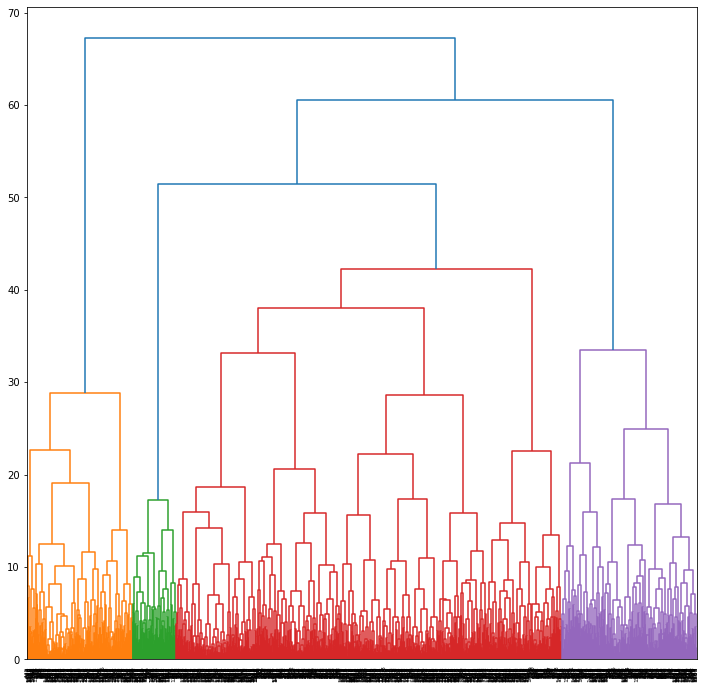

In [11]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

<br>In the plot above, we can see there are three major clusters, so we will instantiate our model with 3 clusters in the next cell.<br>

In [12]:
# INSTANTIATING a k-Means object with clusters
mas_k_pca = KMeans(n_clusters   = 3,
                         random_state = 219)


# fitting the object to the data
mas_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
mas_kmeans_pca = pd.DataFrame({'Cluster': mas_k_pca.labels_})


# checking the results
print(mas_kmeans_pca.iloc[: , 0].value_counts())

1    783
0    389
2    380
Name: Cluster, dtype: int64


<br><br>We observed that the Second cluster has the highest observations accounting for 50% of out samples. we would base our recommendations on these.<br><br> 

In [13]:
#renaming pc columns
pc_column_names =  ['No old skool music channels',
                    'Stimulated Socializers',
                         
                    'Tech Loner',
                    'Tech Social Control',
                    'q4r1', 'q4r2', 'q4r3', 'q4r4',
                    'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10' ]

#renaming the final analysis column names for readability
final_column_names =['Clusters',
                    'No old skool music channels',
                    'Stimulated Socializers',
                    'Tech Loner',
                    'Tech Social Control',
                    'Music and Sound Identification Apps', 'TV Check-in Apps', 
                    'Entertainment Apps', 'TV Show Apps',
                    'Gaming Apps', 'Social Networking Apps', 'General News Apps', 
                    'Shopping Apps', 'Specific Publication News Apps', 'Other',
                    'Age Group','iPhone', 'iPod touch','Android', 'BlackBerry', 
                    'Nokia','Windows Phone or Windows Mobile','HP/ Palm WebOS', 
                    'Tablet (iPad, Xoom, Galaxy Tab etc.)', 'Other smartphone',
                    'Education', 'Marital Status', 'No children', 
                    'children under 6yr', 'children 6-12 yr', 'children 13-17 yr', 
                    'children 18 or older', 'Race', 'Ethnicity', 'Income', 'Gender' ]

In [14]:
# storing cluster centers
centroids_pca = mas_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = pc_column_names


# checking results (clusters = rows, pc = columns)
#centroids_pca_df.round(2)

In [15]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([mas_kmeans_pca,
                         factor_loadings_df],
                         axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([clst_pca_df.round(decimals = 2), 
                                mas_df.loc[ : , add_dem_lst]],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = final_column_names

# checking the results
#final_pca_clust_df.head(n = 5)

In [16]:
# renaming Ages
age_bin       = {1  : 'GEN Z',
                 2  : 'GEN Z',
                 3  : 'Millenials',
                 4  : 'Millenials',
                 5  : 'Millenials',
                 6  : 'GEN X',
                 7  : 'GEN X',
                 8  : 'GEN X',
                 9  : 'Boomers',
                 10 : 'Boomers',
                 11 : 'Boomers'}


final_pca_clust_df['Age Group'].replace(age_bin, inplace = True)



# renaming Education
education_bin = {1 : 'Some high school',
                 2 : 'High school graduate',
                 3 : 'Some college',
                 4 : 'College graduate',
                 5 : 'Some post-graduate studies',
                 6 : 'Post graduate degree'}


final_pca_clust_df['Education'].replace(education_bin, inplace = True)


# renaming Marital Status
Marital_status = {1 : 'Married',
                 2 : 'Single',
                 3 : 'Single with a partner',
                 4 : 'Separated/Widowed/Divorced'}


final_pca_clust_df['Marital Status'].replace(Marital_status, inplace = True)


# renaming Race
race_bin      = {1 : 'White or Caucasian',
                 2 : 'Black or African American',
                 3 : 'Asian',
                 4 : 'Native Hawaiian or Other Pacific Islander',
                 5 : 'American Indian or Alaska Native',
                 6 : 'Other race'}


final_pca_clust_df['Race'].replace(race_bin, inplace = True)


# renaming Ethnicity
his_lat       = {1 : 'Yes',
                 2 : 'No'}


final_pca_clust_df['Ethnicity'].replace(his_lat, inplace = True)


# renaming Income
income_bin       = {1  : '0 - 19,999',
                    2  : '0 - 19,999',
                    3  : '0 - 19,999',
                    4  : '20,000 - 59,999',
                    5  : '20,000 - 59,999',
                    6  : '20,000 - 59,999',
                    7  : '20,000 - 59,999',
                    8  : '60,000 - 89,999',
                    9  : '60,000 - 89,999',
                    10 : '60,000 - 89,999',
                    11 : '90,000 - 149,999',
                    12 : '90,000 - 149,999',
                    13 : '90,000 - 149,999',
                    14 : '150,000 and above'}


final_pca_clust_df['Income'].replace(income_bin, inplace = True)


# renaming Gender
gender_bin    = {1 : 'Male',
                 2 : 'Female'}


final_pca_clust_df['Gender'].replace(gender_bin, inplace = True)

# renaming clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5',
                 5 : 'Cluster 6',
                 6 : 'Cluster 7',
                 7 : 'Cluster 8'}


final_pca_clust_df['Clusters'].replace(cluster_names, inplace = True)

# adding a productivity step
data_df = final_pca_clust_df


# checking results
#data_df

<br><br>
<br><h3>Analysis with demographics - Box plot </h3><br>
 <br>


<br><br>

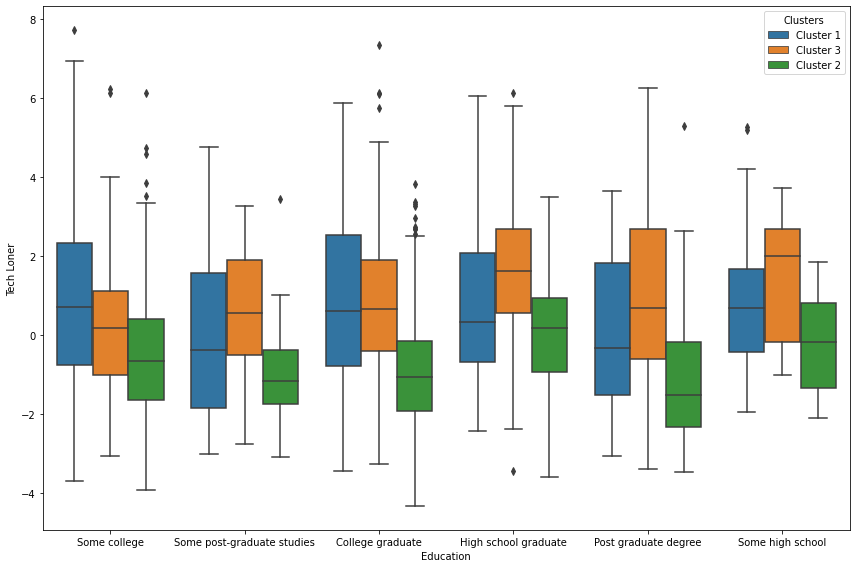

In [17]:
########################
# Education 
########################
# Tech Loner
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Education',
            y    = 'Tech Loner',
            hue  = 'Clusters',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<br><br><br><strong>Education || Tech Loner </strong><br>
High school graduates and individuals who completed some high school are more inclined to immerse them selves with internet and stay secluded. high school graduates tend to avoid social engagements because there are no achievements to show off or share with others.  

<br><br><br>

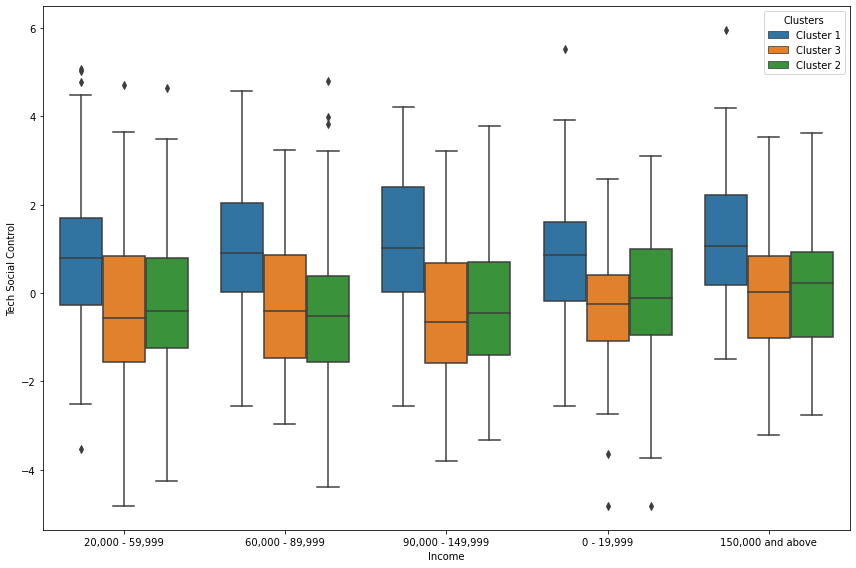

In [18]:
########################
# Income
########################
# Tech Social Control 
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Income',
            y    = 'Tech Social Control',
            hue  = 'Clusters',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<br><br><br><strong>Income || Tech Social Control </strong><br>
Those who are wealthy use technology mostly to control their surroundings and social life. Individuals with more money and resources are practical and have less time, so they tend to use internet to stay connected with their social life. 

<br><br><br>

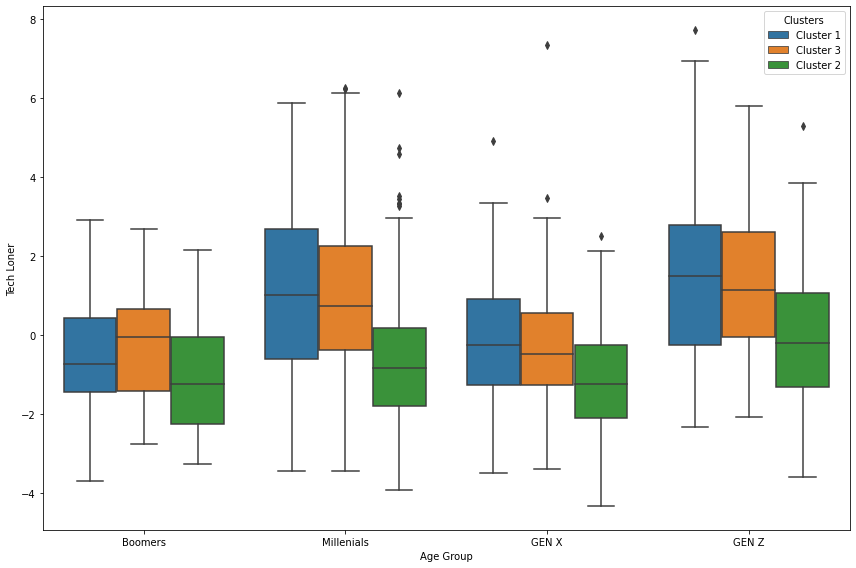

In [19]:
########################
# Age Group 
########################
# Tech Loner
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Age Group',
            y    = 'Tech Loner',
            hue  = 'Clusters',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<br><br><br><strong>Age Group  || Tech Loner </strong><br>
The Gen Z generation tends to relate to the tech loner segment to avoid social commitments with friends and family and use the internet to connect with their favorite popular cultural interest.   

<br><br><br>

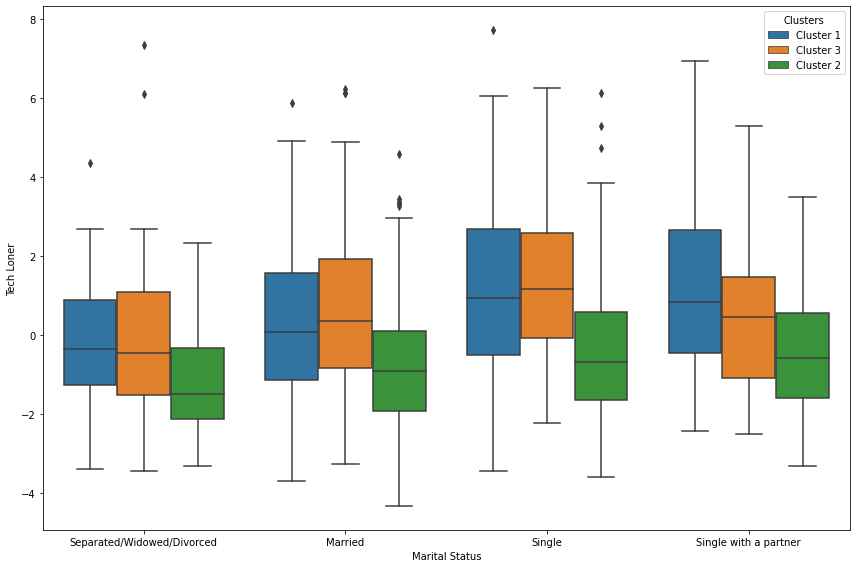

In [20]:
########################
# Marital Status 
########################
# Tech Loner
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Marital Status',
            y    = 'Tech Loner',
            hue  = 'Clusters',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<br><br><br><strong>Marital Status || Tech Loner </strong><br>
Those who are separated Widowed or divorced tend to avoid relationships and would use tech to occupy their time while avoiding social engagements

<br><br><br>

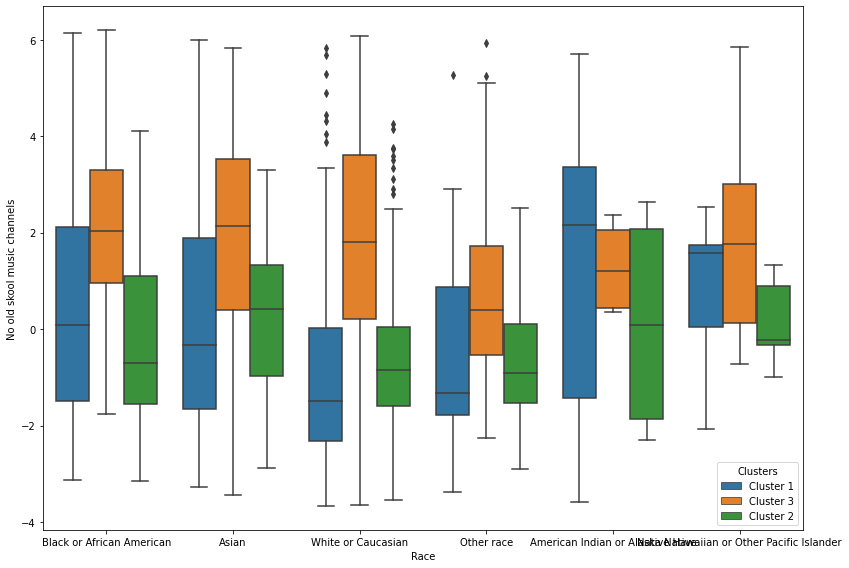

In [21]:
########################
# Race
########################
# No old skool music channels
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Race',
            y    = 'No old skool music channels' ,
            hue  = 'Clusters',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<br><br><br><strong>Race || No old skool music channels </strong><br>
Race is so segmented. Asian and  American Indian or Alaska Native are more inclined not to use older music channels. 
<br><br><br>

<br><br><h3>Conclusion</h3>

After analysis of the 
After testing demographic characteristics against behavioral and psychometric responses, we conclude that the marketing department focuses on these user segments to tailor any new applications to cater to their needs. 

<ul>
    <li>Focus on people who are separated Widowed or divorced because they'll make great customers applications for self development and emotional expressions.  </li>
    <li>The Gen Z generation would be a great fit for application based on trends and socialization. </li>
    <li>Focus on Productivity and social applications for for practical high income people. </li>
</ul>
<br><br>